# WeatherPy

In [1]:
# Requests
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:60]):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
    
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")

            # Append the City information into city_data list
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Pressure": city_pressure,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"YO! The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinop
Processing Record 2 of Set 1 | pego
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | kapa'a
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | as sulayyil
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | qal'ah-ye shahr
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | semnan
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | alliance
Processing Record 20 of Set 1 | funafuti
Processing Record 21 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          57
Lat           57
Lng           57
Max Temp      57
Humidity      57
Cloudiness    57
Wind Speed    57
Pressure      57
Country       57
Date          57
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Sinop Province,41.7711,34.8709,37.09,51,26,9.71,1025,TR,1735876930
1,Pego,38.8527,-0.0900,51.94,61,16,10.54,1024,ES,1735876931
2,Iqaluit,63.7506,-68.5145,19.13,85,100,0.00,1016,CA,1735876933
3,Qaqortoq,60.7167,-46.0333,28.99,94,99,5.73,1029,GL,1735876935
4,Utrik,11.2278,169.8474,81.00,78,99,14.61,1009,MH,1735876936


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
df = pd.read_csv("output_data/cities.csv",index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Sinop Province,41.7711,34.8709,37.09,51,26,9.71,1025,TR,1735876930
1,Pego,38.8527,-0.0900,51.94,61,16,10.54,1024,ES,1735876931
2,Iqaluit,63.7506,-68.5145,19.13,85,100,0.00,1016,CA,1735876933
3,Qaqortoq,60.7167,-46.0333,28.99,94,99,5.73,1029,GL,1735876935
4,Utrik,11.2278,169.8474,81.00,78,99,14.61,1009,MH,1735876936


In [8]:
# Data Cleaning with Dates
df["Date"] = pd.to_datetime(df.Date * 1e9)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Sinop Province,41.7711,34.8709,37.09,51,26,9.71,1025,TR,2025-01-03 04:02:10
1,Pego,38.8527,-0.0900,51.94,61,16,10.54,1024,ES,2025-01-03 04:02:11
2,Iqaluit,63.7506,-68.5145,19.13,85,100,0.00,1016,CA,2025-01-03 04:02:13
3,Qaqortoq,60.7167,-46.0333,28.99,94,99,5.73,1029,GL,2025-01-03 04:02:15
4,Utrik,11.2278,169.8474,81.00,78,99,14.61,1009,MH,2025-01-03 04:02:16


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

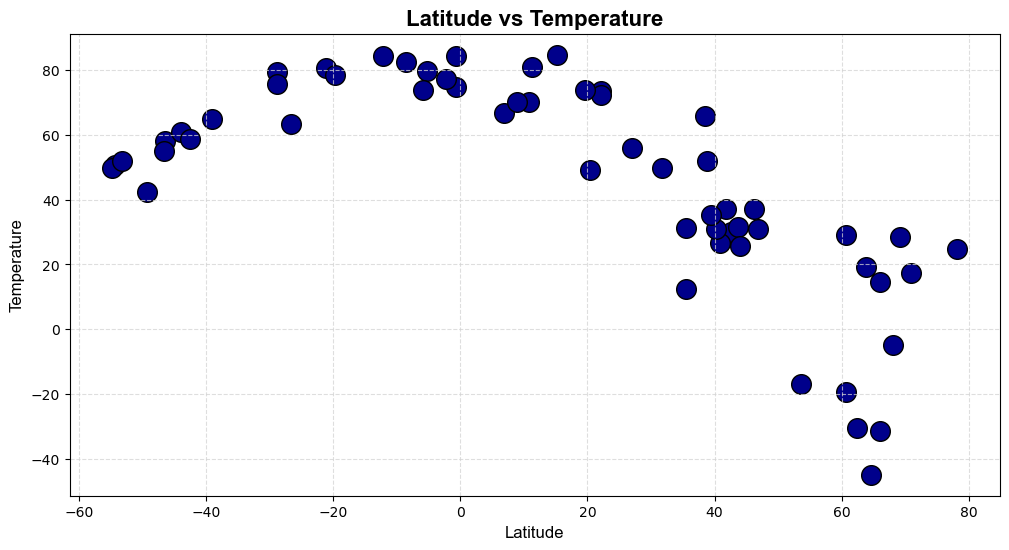

In [9]:
# Build scatter plot for latitude vs. temperature

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Max Temp"], color="darkblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

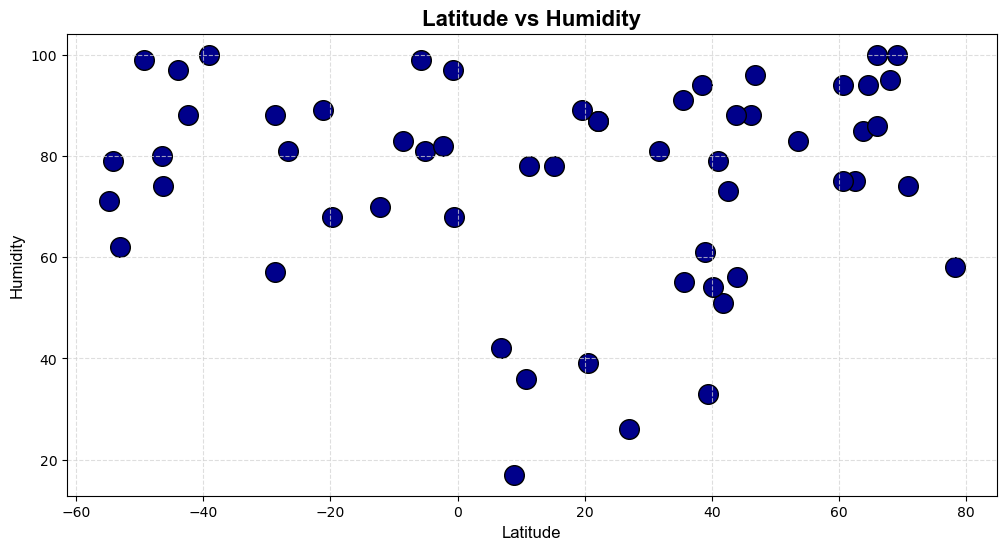

In [10]:
# Build the scatter plots for latitude vs. humidity
# Canvas Size
plt.figure(figsize=(12,6))

#Basic Plot
plt.scatter(df.Lat, df["Humidity"], color="darkblue", edgecolor="black", s=200)

#Customizations - Changecolors, Add refrence lines, add lables/title
plt.xlabel("Latitude", fontfamily="Arial",fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")

#Add background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

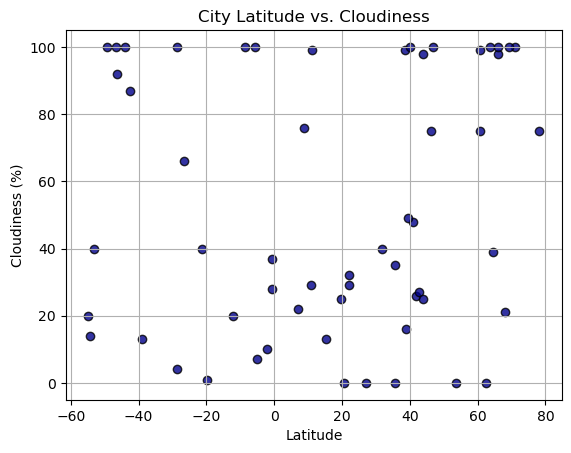

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="darkblue",
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

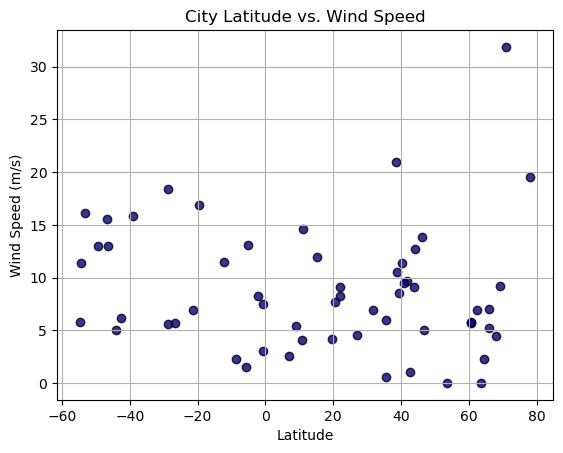

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="darkblue",
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
   
    #regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)
    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="darkblue", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

    #Customizations
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    plt.grid(linestyle="--", color="white", alpha=0.75)
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    plt.show()
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >=0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Sinop Province,41.7711,34.8709,37.09,51,26,9.71,1025,TR,2025-01-03 04:02:10
1,Pego,38.8527,-0.0900,51.94,61,16,10.54,1024,ES,2025-01-03 04:02:11
2,Iqaluit,63.7506,-68.5145,19.13,85,100,0.00,1016,CA,2025-01-03 04:02:13
3,Qaqortoq,60.7167,-46.0333,28.99,94,99,5.73,1029,GL,2025-01-03 04:02:15
4,Utrik,11.2278,169.8474,81.00,78,99,14.61,1009,MH,2025-01-03 04:02:16


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat <0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Invercargill,-46.4000,168.3500,58.01,74,92,13.00,1009,NZ,2025-01-03 04:02:17
1,West Island,-12.1568,96.8225,84.18,70,20,11.50,1009,CC,2025-01-03 04:02:24
2,Avarua,-21.2078,-159.7750,80.65,89,40,6.91,1010,CK,2025-01-03 04:02:26
3,Waitangi,-43.9535,-176.5597,60.82,97,100,5.01,997,NZ,2025-01-03 04:02:28
4,Port Mathurin,-19.6833,63.4167,78.42,68,1,16.91,1014,MU,2025-01-03 04:02:31


###  Temperature vs. Latitude Linear Regression Plot

-0.7988886461899353
y = -1.32x + 88.14


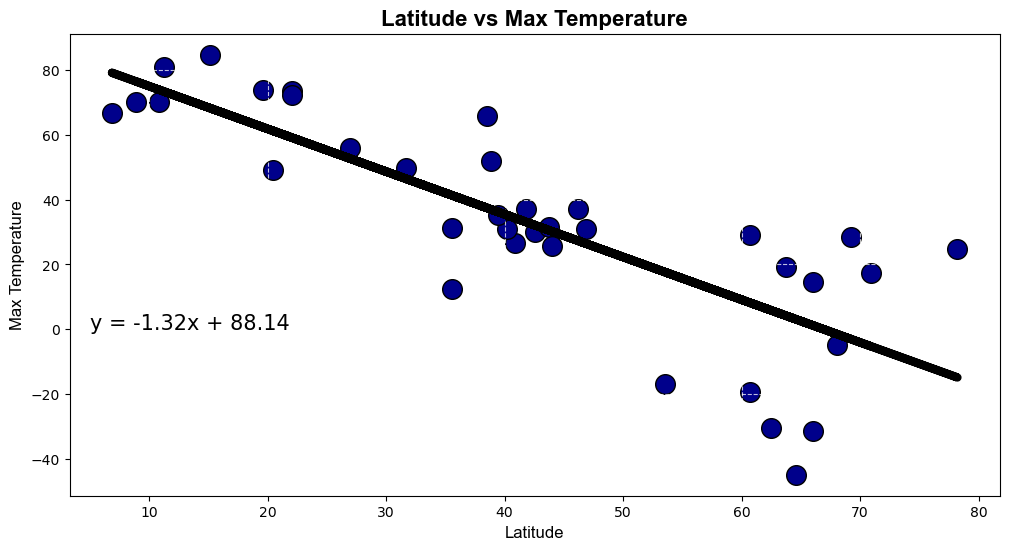

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.8808848940052334
y = 0.59x + 84.52


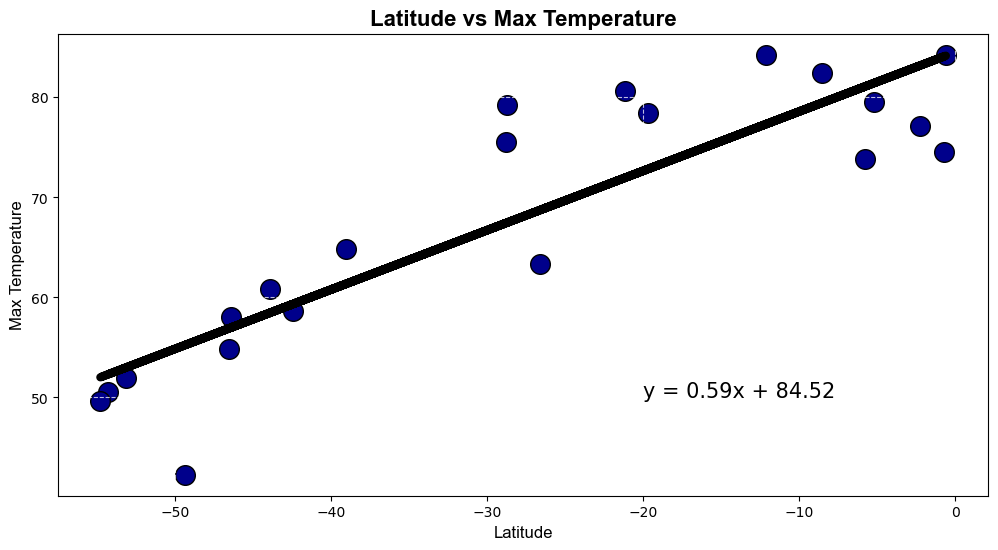

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (-20, 50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

Discussion about the linear relationship: I concluded the southern hemisphere had more consistency then northern hemisphere. The northern hemisphere has more outliers. 

### Humidity vs. Latitude Linear Regression Plot

0.47469542739770376
y = 0.54x + 49.66


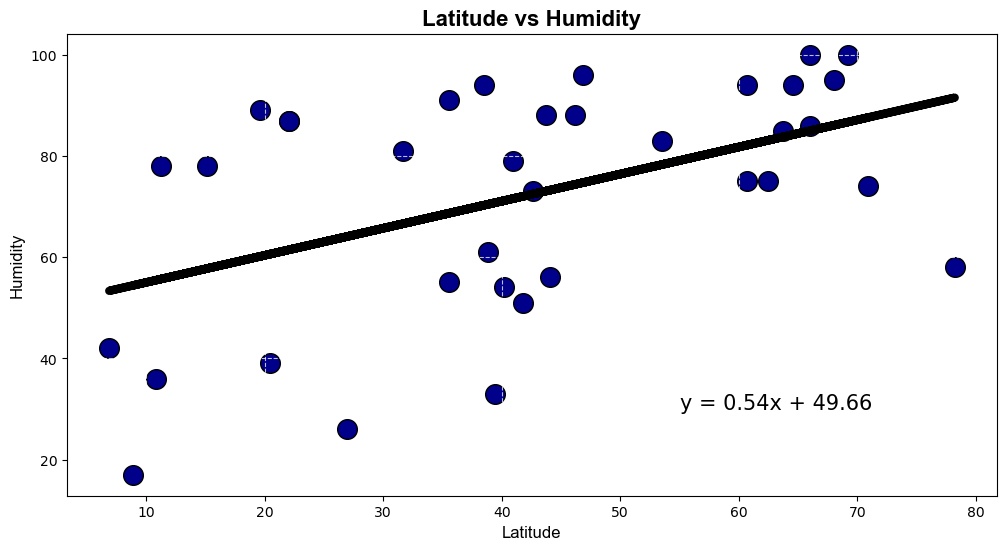

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.0652875829369517
y = 0.04x + 82.76


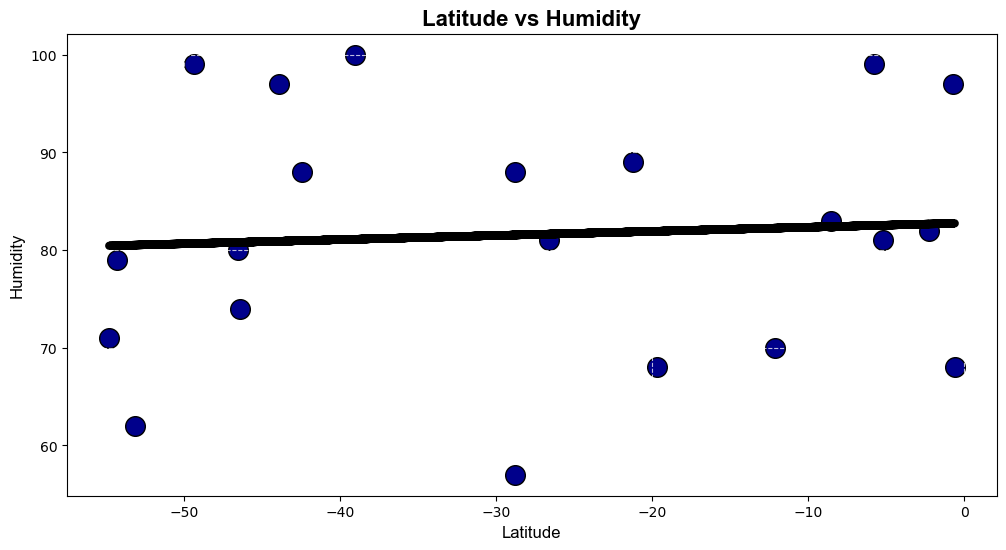

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (-20, 50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship: I don't feel there was much correlation with the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

0.38064164485978425
y = 0.71x + 21.91


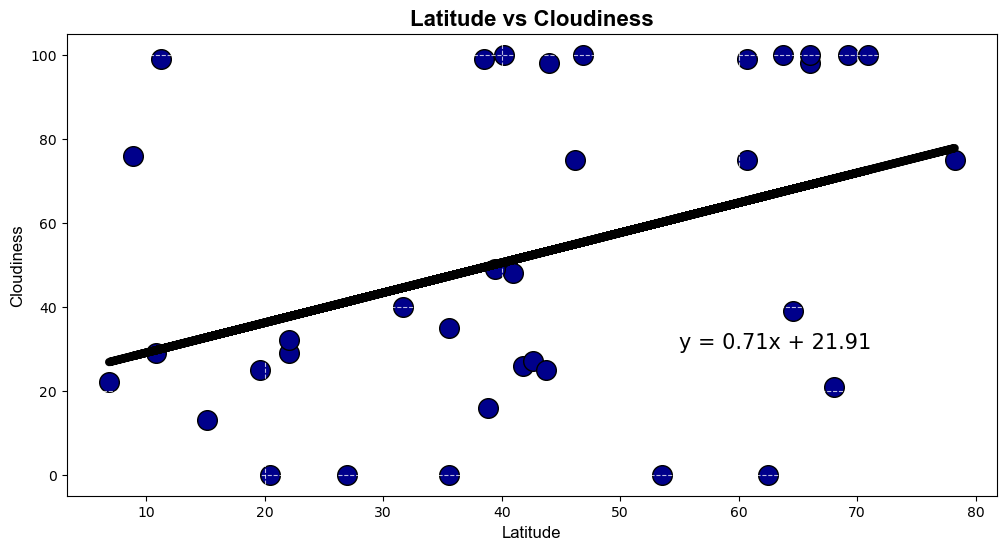

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (55, 30)


do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.22463733817752138
y = -0.46x + 38.56


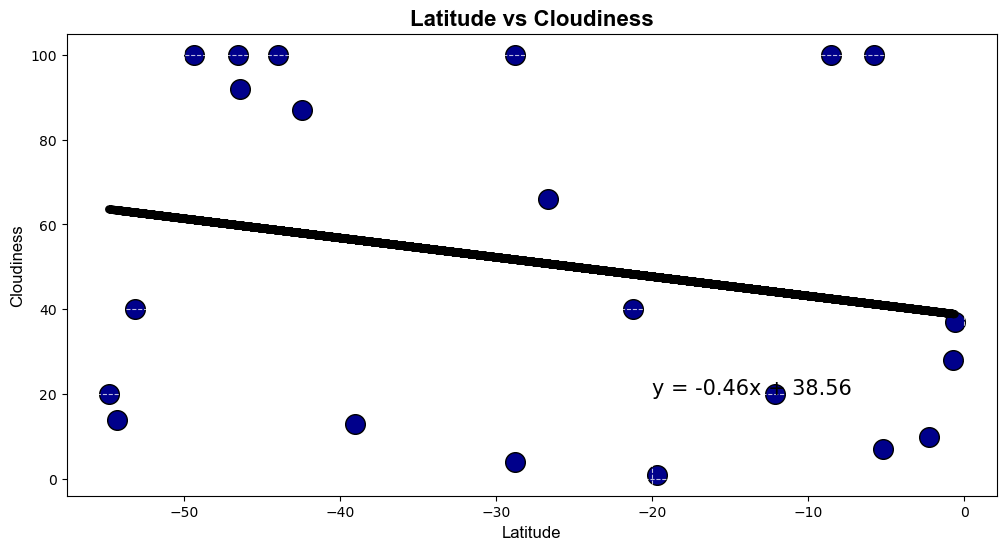

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-20, 20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship: there is also no correlation between latitude and the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

0.1547085198767787
y = 0.05x + 6.17


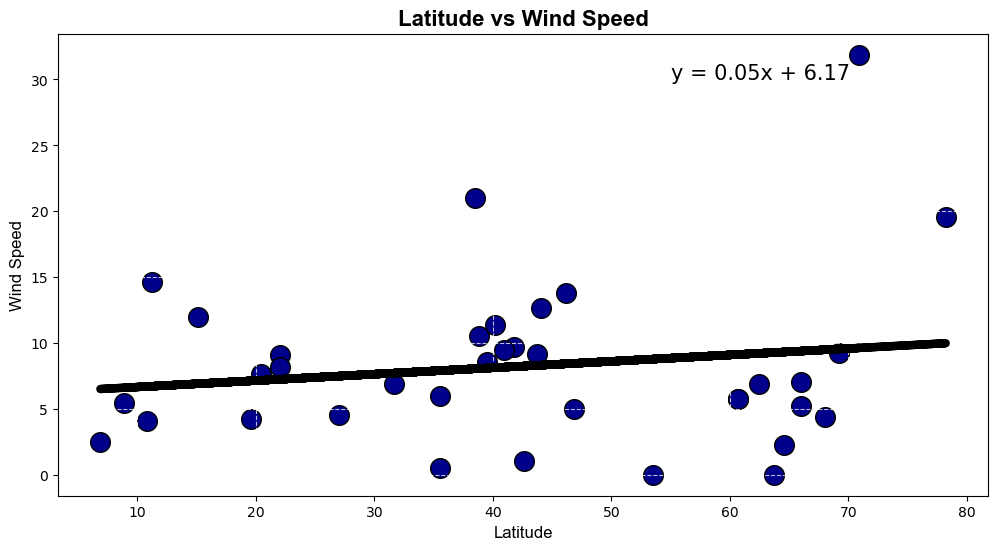

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (55, 30)


do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.36621536537166743
y = -0.1x + 6.91


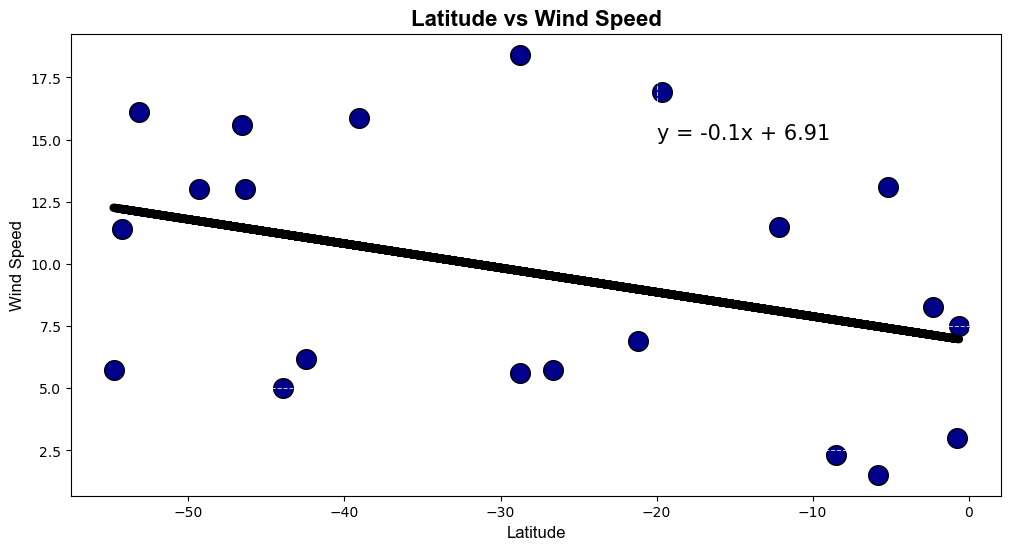

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-20, 15)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship: southern hemisphere there was a negative correlation between latitude and wind speed, however in the northern hemisphere there was less outliers than in southern hemisphere.